In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Read in csv
cluster_data = pd.read_csv('./Data/cluster_data.csv')
cluster_data.head()

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,gender,city_name
0,1362480,269.266706,20.00,1187.97,86.86,50890,33,3,2,M,New York City
1,1362484,381.386000,369.72,2122.17,95.32,10053,42,2,0,F,Denver
2,1362485,278.479306,1100.00,0.00,45.49,22690,25,4,0,F,New York City
3,1362486,98.289600,0.00,116.24,3312.27,10701,76,6,0,F,Dallas
4,1362487,211.563389,1548.23,12.89,1401.21,6605,71,1,0,M,Los Angeles


In [3]:
# Prepare data for banking behavior clustering
# Drop customer id, age, number of children, gender, city name
banking_data_raw = cluster_data.drop(columns=['cust_id', 'age', 'nbr_children', 'gender', 'city_name'])
# Create columns for TODO


,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,years_with_bank
0,0.006276,-0.659356,0.209894,-0.384897,1.303330,-0.303070
1,0.407227,-0.385498,0.739195,-0.376838,-0.580153,-0.674388
2,0.039221,0.186369,-0.463189,-0.424306,0.002690,0.068249
3,-0.605156,-0.675017,-0.397330,2.687645,-0.550266,0.810885
4,-0.200077,0.537368,-0.455886,0.867159,-0.739182,-1.045707


In [ ]:
# Scale remaining columns
scaler = StandardScaler().set_output(transform='pandas')
banking_data_scaled = scaler.fit_transform(banking_data_raw)
banking_data_scaled.head()

In [4]:
# KMeans

# Hyperparameters
# 3-5 Clusters specified by readme, trying 2-6 for education
ClusterRange = range(2, 7)

model_KMeans = None
X = banking_data_scaled
inertias_KMeans = []
label = None
silhouettes_KMeans = []

for i in ClusterRange:
    # Instantiate
    model_KMeans = KMeans(n_clusters = i)
    # Train
    model_KMeans.fit(X)
    # Store inertias
    inertias_KMeans.append(model_KMeans.inertia_)
    # Store silhouettes
    label = model_KMeans.predict(X)
    silhouettes_KMeans.append(silhouette_score(X, label))


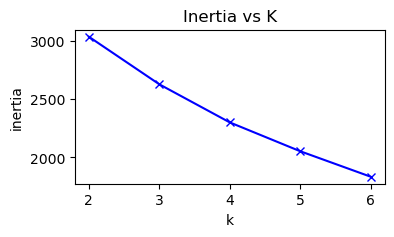

In [7]:
# plot elbow method
plt.figure(figsize=(4,2))
plt.plot(ClusterRange, inertias_KMeans, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Inertia vs K')
plt.show()

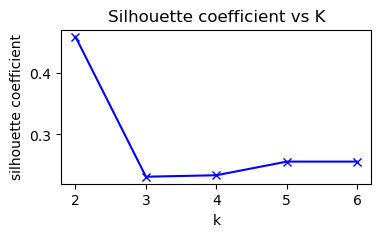

In [6]:
# plot silhouette coefficients
plt.figure(figsize=(4,2))
plt.plot(ClusterRange, silhouettes_KMeans, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()